 1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans: The resultant matrix will be of the size (n,m). The multiplication is performed by multiplying elements from the corresponding row of first matrix and column of second matrix, and       then finally summing these products.
     The number of multiplications performed would be (n*m*k) while the number of additions would be (n*m*(k-1)).

2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [4]:
# Solution

# USING NESTED LISTS
import timeit
def matrix_mul(a,b):
    n = len(a)
    k = len(b)
    m = len(b[0])
    res = [[0]* m for i in range(n)]
    for x in range(n):
        for y in range(m):
            for z in range(k):
                res[x][y] += a[x][z] * b[z][y]
    return res

matrix_a = [[1,2,3],[4,5,6]]
matrix_b = [[7,8],[9,10],[11,12]]
ans = matrix_mul(matrix_a,matrix_b)

print("The answer of matrix multiplication of the given matrices is: ")
for row in ans:
    print(row)

print("the runtime of nested list method is: ")
%timeit matrix_mul(matrix_a,matrix_b)

The answer of matrix multiplication of the given matrices is: 
[58, 64]
[139, 154]
the runtime of nested list method is: 
7.41 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
# USING NUMPY

import numpy as np

matrix_a = np.array([[1,2,3],[4,5,6]])
matrix_b = np.array([[7,8],[9,10],[11,12]])

res_np = np.dot(matrix_a,matrix_b)
print("\nthe answer of matrix multiplication using numpy is: ")
print(res_np)
print("the runtime of the numpy method is: ")
%timeit np.dot(matrix_a,matrix_b)


the answer of matrix multiplication using numpy is: 
[[ 58  64]
 [139 154]]
the runtime of the numpy method is: 
2.2 µs ± 380 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


The numpy solution is faster than the nested lists method because numpy library is implemented in C language, making its implementation faster.
This is  verified by using the 'timeit' module of python to compare the runtime of both methods.

3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

ANS: When we use the given method, our loop is executed about n/2 times and the array is iterated entirely. Therefore the overall time complexity thus becomes the sum of (1+2+3...n/2), due to which  the time complexity comes out to be O(n^2).

In [14]:
## SLOWER METHOD

def find_median_slow(arr):
    max = arr[0]
    second_max = arr[1]

    for num in arr:
        if num > max:
            second_max = max
            max = num
        elif num > second_max:
            second_max = num

    return second_max

5


In [16]:
## Faster Method

def find_median_fast(arr):
    sorted_array = sorted(arr)
    n = len(arr)
    mid = n//2
    if (n%2) == 0:
        return(sorted_array[mid-1] + sorted_array[mid])/2
    else:
        return sorted_array[mid]

COMPARING RUNTIMES OF THREE METHODS: GIVEN APPROACH, SORTED APPROACH AND NUMPY LIBRARY 

In [18]:
import numpy as np
arr = [1,5,2,7,4,8,6]
%timeit find_median_slow(arr)
%timeit find_median_fast(arr)
%timeit np.median(arr)

## THE NUMPY METHOD TURNS OUT TO BE THE FASTEST

2.88 µs ± 19.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
383 ns ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
19 µs ± 190 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


4) What is the gradient of the following function with respect to x and y?
 $x^2y +y^3sin(x)$

  ANS: Gradient with respect to x =>  $2xy + y^3  \cos(x)$ 
     and Gradient with respect to y => $x^2 + 3y^2 \sin(x)$

5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [20]:
import jax
def func(x, y):
    return x**2 * y + y**3 * jax.numpy.sin(x)

def analytical_gradient(x, y):
    df_dx = 2 * x * y + y**3 * jax.numpy.cos(x)
    df_dy = x**2 + 3 * y**2 * jax.numpy.sin(x)
    return df_dx, df_dy

gradient_jax = jax.grad(func, (0, 1))

x = 2.0
y = 3.0

analytical_grad = analytical_gradient(x, y)
jax_grad = gradient_jax(x, y)

print("Analytical Gradient:", analytical_grad)
print("JAX Gradient:", jax_grad)

Analytical Gradient: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))
JAX Gradient: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))


6) Use sympy to confirm that you obtain the same gradient analytically.

In [22]:
from sympy import symbols, diff, sin
x, y = symbols('x y')
q = x**2 * y + y**3 * sin(x)
df_dx = diff(q, x)
df_dy = diff(q, y)
print("Analytical Gradient with respect to x:", df_dx)
print("Analytical Gradient with respect to y:", df_dy)

Analytical Gradient with respect to x: 2*x*y + y**3*cos(x)
Analytical Gradient with respect to y: x**2 + 3*y**2*sin(x)


#### Q7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
1. 2022
    1.Branch 1
        1.Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2.Branch 2
2. 2023
    1.Branch 1
    2.Branch 2
3. 2024
    1.Branch 1
    2.Branch 2
4. 2025
    1.Branch 1
    2.Branch 2

In [23]:
info = {
    2022: {
        'Branch 1': {
            1: {'Name': 'Dev','Roll Number': 54, 'Marks': {'DSA': 95, 'COA': 77}},
        },
        'Branch 2': {
        }
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {},
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {},
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {},
    },
}

marks = info[2022]['Branch 1'][1]['Marks']
print(marks)


{'DSA': 95, 'COA': 77}


#### Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

#### Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
$1. y=x 
 2. y=x^{2}
 3. y=\frac{x^{3}}{100}
 4. y=sin(x)
 5. y=\frac{sin(x)}{x}
 6. y=log(x)
 7. y=e^{x}
$

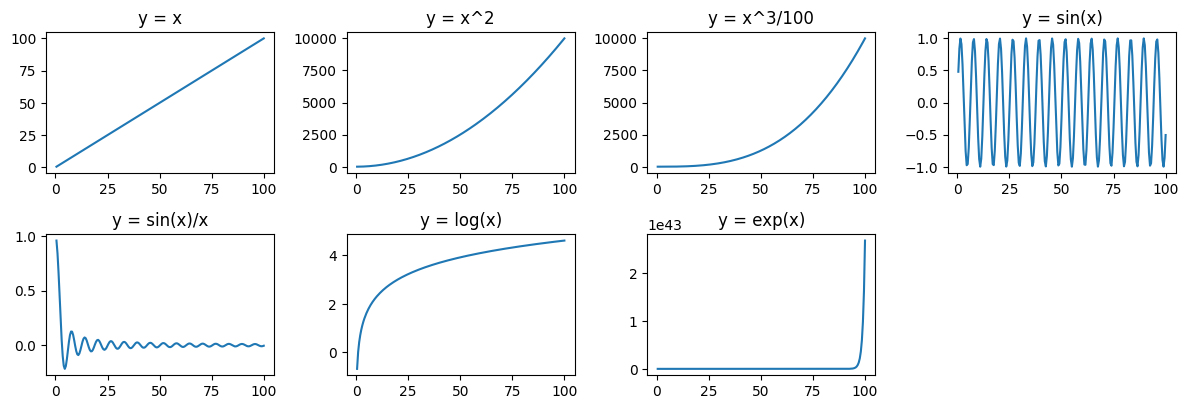

In [28]:
import matplotlib.pyplot as plt
import numpy as np
x= np.arange(0.5, 100.5, 0.5)
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(12, 8))

plt.subplot(4, 4, 1)
plt.plot(x, y1)
plt.title("y = x")

plt.subplot(4, 4, 2)
plt.plot(x, y2)
plt.title("y = x^2")

plt.subplot(4, 4, 3)
plt.plot(x, y3)
plt.title("y = x^3/100")

plt.subplot(4, 4, 4)
plt.plot(x, y4)
plt.title("y = sin(x)")

plt.subplot(4, 4, 5)
plt.plot(x, y5)
plt.title("y = sin(x)/x")

plt.subplot(4, 4, 6)
plt.plot(x, y6)
plt.title("y = log(x)")

plt.subplot(4, 4, 7)
plt.plot(x, y7)
plt.title("y = exp(x)")

plt.tight_layout()
plt.show()


#### Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [10]:
import numpy as np
import pandas as pd
matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
highest_std= df.std().idxmax()
lowest_mean = df.mean(axis=1).idxmin()

print("DataFrame:")
print(df)

print("\nColumn with the highest standard deviation:",highest_std)
print("Row with the lowest mean:",lowest_mean)


DataFrame:
           a         b         c         d         e
0   1.495952  1.427209  1.895283  1.930914  1.928042
1   1.005260  1.450018  1.530956  1.042459  1.249519
2   1.271865  1.173584  1.281961  1.498399  1.265809
3   1.074557  1.174149  1.018131  1.429714  1.508372
4   1.975490  1.715732  1.073933  1.108245  1.908613
5   1.200202  1.023487  1.019833  1.244505  1.210442
6   1.453096  1.435019  1.891221  1.612180  1.183098
7   1.380986  1.873998  1.862721  1.887993  1.372484
8   1.233180  1.488590  1.116401  1.702173  1.969358
9   1.480200  1.379556  1.573193  1.455023  1.362628
10  1.036808  1.284761  1.377360  1.805032  1.158458
11  1.216431  1.744770  1.105763  1.161685  1.086916
12  1.285384  1.712555  1.848520  1.394099  1.935713
13  1.286899  1.323435  1.724240  1.635568  1.073162
14  1.392136  1.991808  1.759311  1.420403  1.958936
15  1.327105  1.623499  1.520080  1.714763  1.727117
16  1.675209  1.113983  1.166945  1.249547  1.492378
17  1.973537  1.714740  1.672274  1

#### Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

#### Q12. Write a small piece of code to explain broadcasting in numpy.

In [11]:
'''NumPy has a robust feature called broadcasting that lets you work with arrays of various shapes. 
Offering an easy and effective method for carrying out element-wise operations on arrays of various sizes is the aim of broadcasting.'''

import numpy as np
matrix = np.array([[1, 2, 3], [4, 5, 6]])
result = matrix + 10
print(matrix)
print(result) #After Broadcasting

[[1 2 3]
 [4 5 6]]
[[11 12 13]
 [14 15 16]]


#### Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [12]:
import numpy as np

def our_argmin(arr):
    min_v= arr[0, 0]
    min_i= (0, 0)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i, j] < min_v:
                min_v= arr[i, j]
                min_i= (i, j)
    return min_i

arr = np.array([[3, 1, 4], [1, 5, 9], [2, 6, 5]])

min_index = our_argmin(arr)
print("Index of the minimum element (custom function):", min_index)
min_index_np = np.unravel_index(np.argmin(arr), arr.shape)
print("Index of the minimum element (np.argmin):", min_index_np)


Index of the minimum element (custom function): (0, 1)
Index of the minimum element (np.argmin): (0, 1)
